In [0]:
#We are using Google COLAB(Colaboratory)
#importing modules
#The tale of 2 cities begins here
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

from statsmodels.tsa.ar_model import AR
import pandas as pd
import random 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as mat
from statsmodels.tsa.api import VAR
from statsmodels.stats.stattools import durbin_watson
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#reading csv
data_org=pd.read_csv("/content/drive/My Drive/projectDeng/trains.csv")
datal_org=pd.read_csv("/content/drive/My Drive/projectDeng/label.csv")
datat=data_org.copy()
datal=datal_org.copy()
datat.insert(23,"total_cases",datal.total_cases,True)
datat


city  year  weekofyear  ... station_min_temp_c  total_cases  station_precip_mm
0      sj  1990          18  ...               20.0            4               16.0
1      sj  1990          19  ...               22.2            5                8.6
2      sj  1990          20  ...               22.8            4               41.4
3      sj  1990          21  ...               23.3            3                4.0
4      sj  1990          22  ...               23.9            6                5.8
...   ...   ...         ...  ...                ...          ...                ...
1451   iq  2010          21  ...               22.4            5               27.0
1452   iq  2010          22  ...               21.7            8               36.6
1453   iq  2010          23  ...               19.2            1                7.4
1454   iq  2010          24  ...               21.0            1               16.0
1455   iq  2010          25  ...               22.2            4               20.4

[1456 rows x 25 columns]

In [0]:
#splitting data based on the city
data_sj=datat[datat['city']=='sj']
data_sj['week_start_date']=pd.to_datetime(data_sj['week_start_date'])
data_sj.set_index(['week_start_date'],inplace=True)
data_iq=datat[datat['city']=='iq']
data_iq['week_start_date']=pd.to_datetime(data_iq['week_start_date'])
data_iq.set_index(['week_start_date'],inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
data_sj.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [0]:
#Remove null values from the dataset by adding mean of adjecent terms as the missing element
def removenull(dataq):
  for col in dataq:
    if(col!="city" and col!="week_start_date"):
      num_of_rows=dataq['city'].count()
      for i in range(0,num_of_rows-2):
        if(pd.isna(dataq.iloc[i][col])):
          f_found=i
          first=i-1
          countna=0
          for j in range(f_found,num_of_rows):
            countna=countna+1
            if(not pd.isna(dataq.iloc[j][col])):
              l_found=j
              print(dataq[col][f_found],dataq[col][l_found])
              dataq[col][f_found:l_found].fillna((dataq.iloc[first][col]+dataq.iloc[l_found][col])/2,inplace=True)
              break
  return dataq
data_sj=removenull(data_sj)
data_iq=removenull(data_iq)
data_sj[data_sj['ndvi_ne'].isnull().values]

nan 0.1129
nan 0.192875
nan 0.1902333
nan 0.1462
nan 0.3313
nan 0.1702
nan 0.1279
nan 0.20916669999999998
nan 0.0669
nan 0.0969
nan 0.0801
nan 0.07315
nan 0.12355
nan 0.1016
nan 0.10705
nan 0.08685
nan 0.09995
nan 0.11199999999999999
nan 0.123975
nan -0.01008
nan 0.02835
nan 0.06613333
nan 0.1744667
nan -0.0158
nan 0.07965
nan 0.0374
nan 0.1016
nan -0.1589
nan -0.2902
nan -0.1209
nan 0.1125
nan 0.0805
nan 0.04465
nan 0.2438
nan -0.1193
nan 0.03233333
nan 0.1017
nan 0.14345
nan 0.15495
nan 0.1175
nan 0.0632
nan 0.2346
nan 0.1154
nan 0.013999999999999999
nan 0.076
nan 0.03786667
nan 0.0448
nan 0.3144667
nan 0.0339
nan 0.05763333
nan 0.0795
nan 0.01203333
nan 0.04044
nan -0.0969
nan -0.1171
nan 0.0214
nan -0.1459
nan 0.1409
nan 0.0602
nan 0.06065
nan 0.07745
nan 0.2192
nan 0.0663
nan 0.1545
nan 0.0604
nan 0.0672
nan -0.003
nan 0.05085
nan 0.0213
nan 0.0038666670000000003
nan 0.0501
nan -0.1399
nan 0.0669
nan 0.0341
nan 0.04023333
nan 0.09746667
nan 0.01015
nan 0.087
nan 0.06275
nan 0.1055

Empty DataFrame
Columns: [city, year, weekofyear, ndvi_ne, ndvi_nw, ndvi_se, ndvi_sw, precipitation_amt_mm, reanalysis_air_temp_k, reanalysis_avg_temp_k, reanalysis_dew_point_temp_k, reanalysis_max_air_temp_k, reanalysis_min_air_temp_k, reanalysis_precip_amt_kg_per_m2, reanalysis_relative_humidity_percent, reanalysis_sat_precip_amt_mm, reanalysis_specific_humidity_g_per_kg, reanalysis_tdtr_k, station_avg_temp_c, station_diur_temp_rng_c, station_max_temp_c, station_min_temp_c, total_cases, station_precip_mm]
Index: []

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


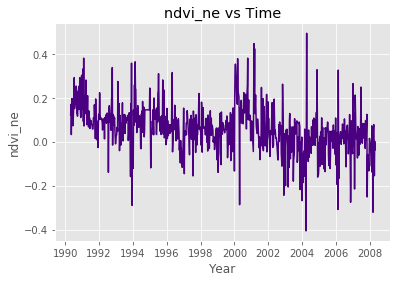


 ndvi_ne is the Pixel northeast of city centroid




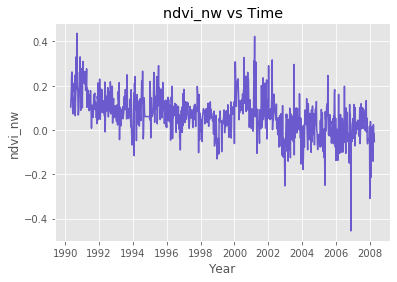


 ndvi_nw is the Pixel northwest of city centroid




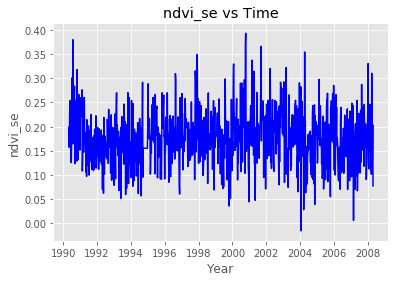


 ndvi_se is the Pixel southeast of city centroid




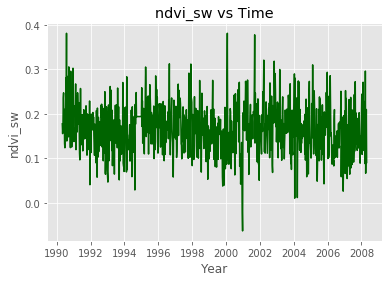


 ndvi_sw is the Pixel southwest of city centroid




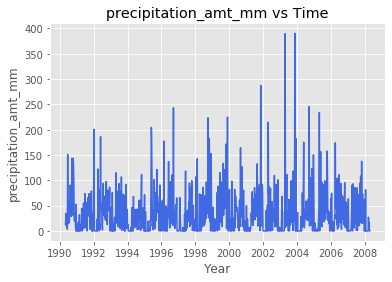


 precipitation_amt_mm is the Total precipitation




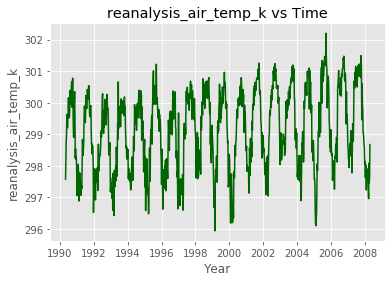


 reanalysis_air_temp_k is the Mean air temperature




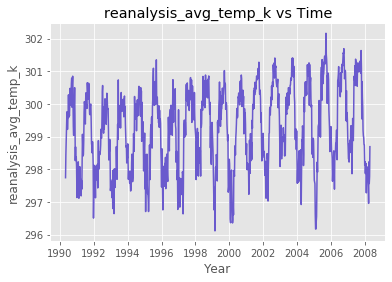


 reanalysis_avg_temp_k is the Average air temperature




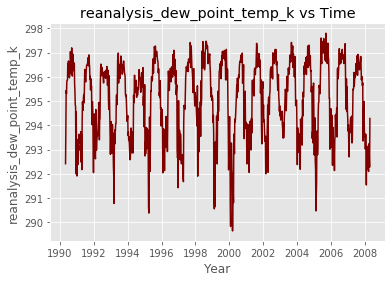


 reanalysis_dew_point_temp_k is the Mean dew point temperature




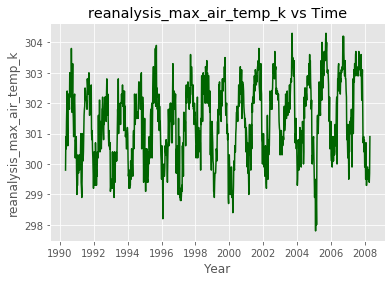


 reanalysis_max_air_temp_k is the Maximum air temperature




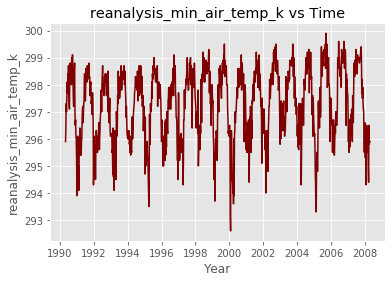


 reanalysis_min_air_temp_k is the Minimum air temperature




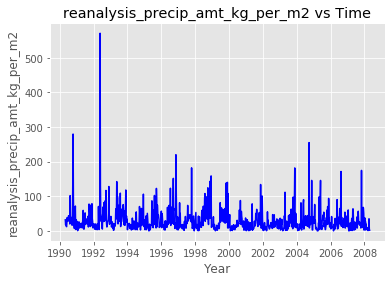


 reanalysis_precip_amt_kg_per_m2 is the Total precipitation




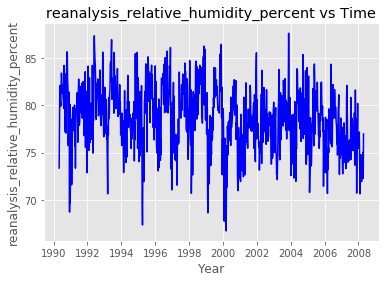


 reanalysis_relative_humidity_percent is the Mean relative humidity




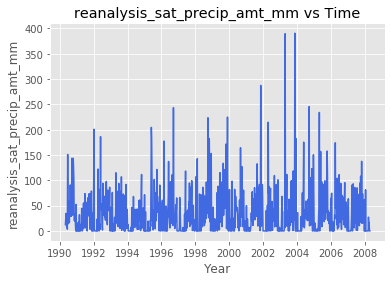


 reanalysis_sat_precip_amt_mm is the Total precipitation




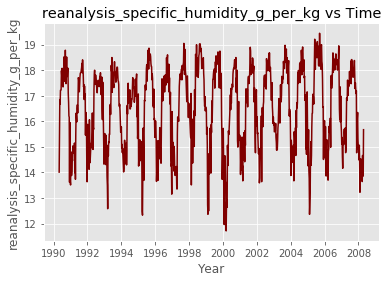


 reanalysis_specific_humidity_g_per_kg is the Mean specific humidity




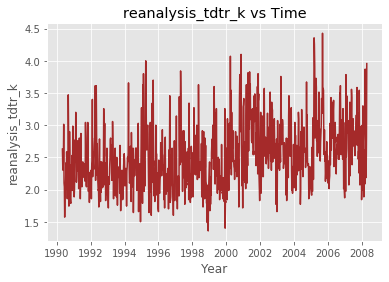


 reanalysis_tdtr_k is the Diurnal temperature range




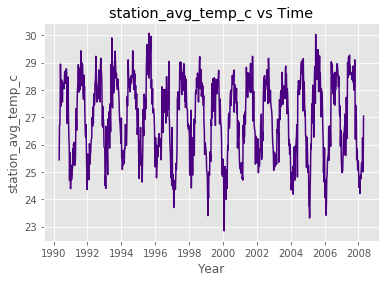


 station_avg_temp_c is the Average temperature




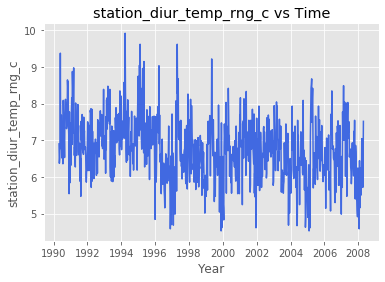


 station_diur_temp_rng_c is the Diurnal temperature range




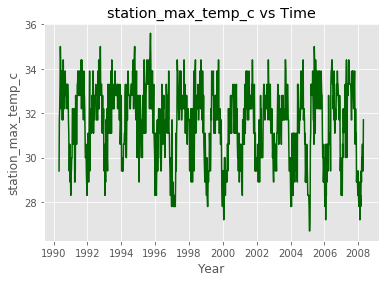


 station_max_temp_c is the Maximum temperature




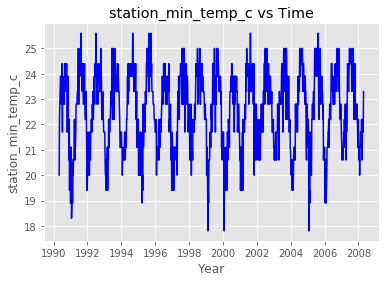


 station_min_temp_c is the Minimum temperature




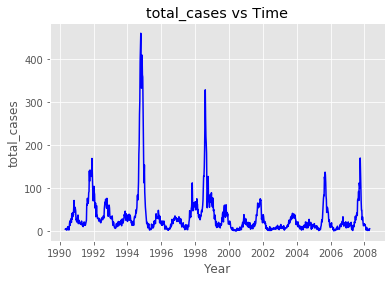


 total_cases is the total no of cases




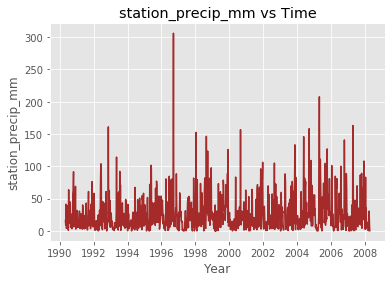


 station_precip_mm is the Total precipitation




In [0]:
#visualization for tthe city sj(san juan)
dataset_det={'station_max_temp_c' : 'Maximum temperature',
'station_min_temp_c' : 'Minimum temperature',
'station_avg_temp_c': 'Average temperature',
'station_precip_mm' :'Total precipitation',
'station_diur_temp_rng_c' : 'Diurnal temperature range',
'precipitation_amt_mm':'Total precipitation',
'reanalysis_sat_precip_amt_mm':'Total precipitation',
'reanalysis_dew_point_temp_k': 'Mean dew point temperature',
'reanalysis_air_temp_k' :'Mean air temperature',
'reanalysis_relative_humidity_percent' : 'Mean relative humidity',
'reanalysis_specific_humidity_g_per_kg' : 'Mean specific humidity',
'reanalysis_precip_amt_kg_per_m2' : 'Total precipitation',
'reanalysis_max_air_temp_k' : 'Maximum air temperature',
'reanalysis_min_air_temp_k' : 'Minimum air temperature',
'reanalysis_avg_temp_k' :'Average air temperature',
'reanalysis_tdtr_k' : 'Diurnal temperature range',
'ndvi_se' : 'Pixel southeast of city centroid',
'ndvi_sw' : 'Pixel southwest of city centroid',
'ndvi_ne' : 'Pixel northeast of city centroid',
'ndvi_nw' : 'Pixel northwest of city centroid',
'total_cases':'total no of cases'}
set_of_colors=['blue','darkgreen','brown','royalblue','maroon','darkviolet','slateblue','indigo']

d_columns=data_sj.columns
for col in d_columns:
  if col not in ['year','weekofyear','city']:
    dfo=data_sj[col]
    mat.style.use('ggplot')
    mat.plot(dfo.index,dfo,color=random.choice(set_of_colors))
    mat.xlabel('Year') 
    mat.ylabel(col)
    mat.title(col+' vs Time')
    mat.show()
    print("\n",col + " is the "+ dataset_det[col]+"\n\n")



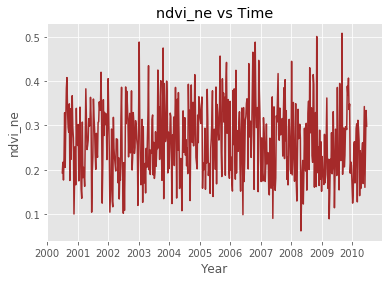


 ndvi_ne is the Pixel northeast of city centroid




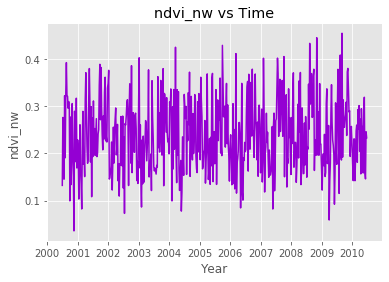


 ndvi_nw is the Pixel northwest of city centroid




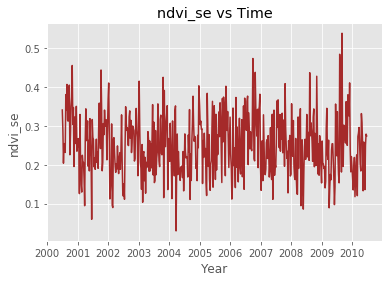


 ndvi_se is the Pixel southeast of city centroid




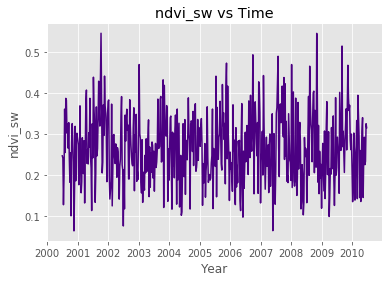


 ndvi_sw is the Pixel southwest of city centroid




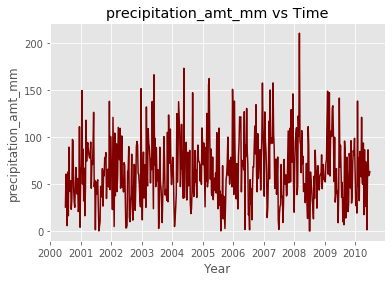


 precipitation_amt_mm is the Total precipitation




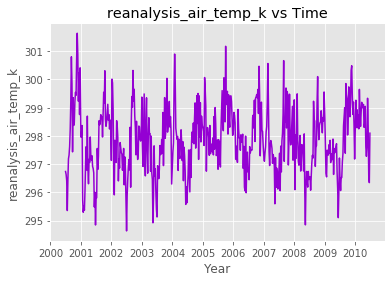


 reanalysis_air_temp_k is the Mean air temperature




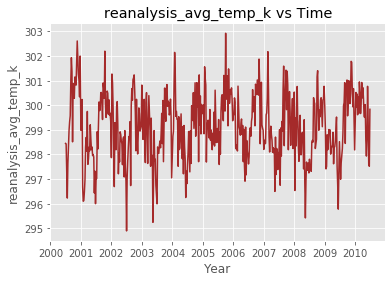


 reanalysis_avg_temp_k is the Average air temperature




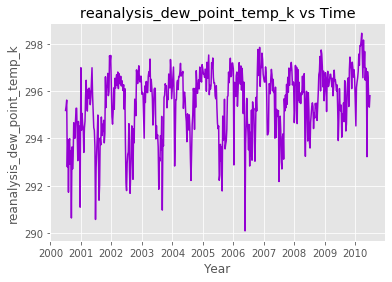


 reanalysis_dew_point_temp_k is the Mean dew point temperature




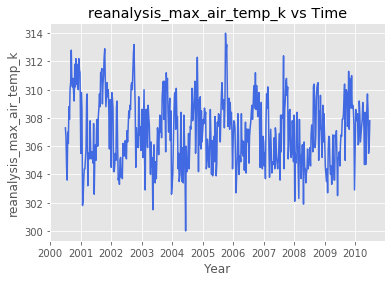


 reanalysis_max_air_temp_k is the Maximum air temperature




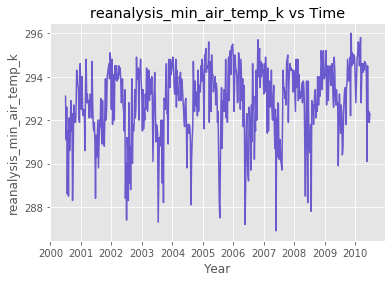


 reanalysis_min_air_temp_k is the Minimum air temperature




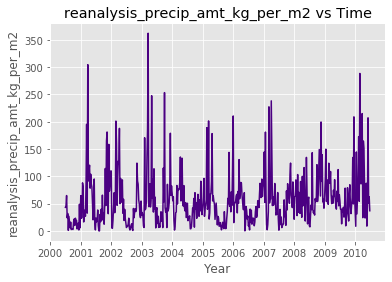


 reanalysis_precip_amt_kg_per_m2 is the Total precipitation




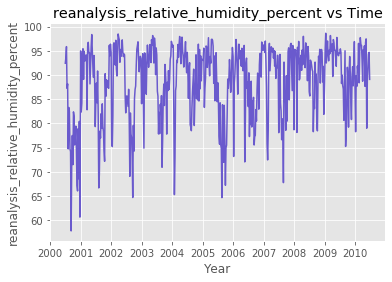


 reanalysis_relative_humidity_percent is the Mean relative humidity




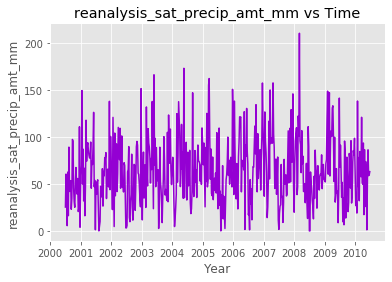


 reanalysis_sat_precip_amt_mm is the Total precipitation




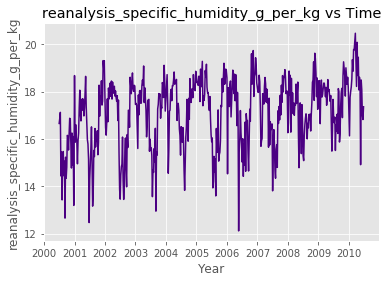


 reanalysis_specific_humidity_g_per_kg is the Mean specific humidity




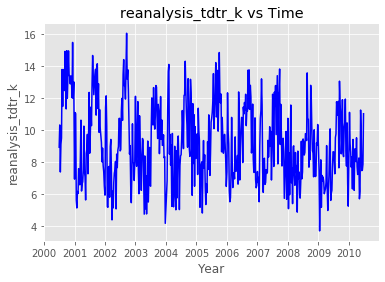


 reanalysis_tdtr_k is the Diurnal temperature range




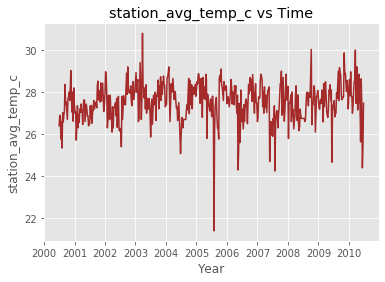


 station_avg_temp_c is the Average temperature




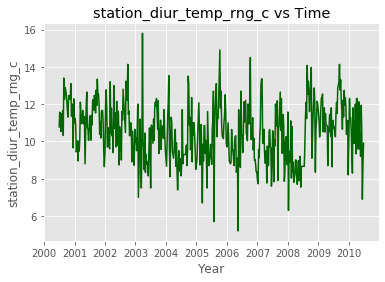


 station_diur_temp_rng_c is the Diurnal temperature range




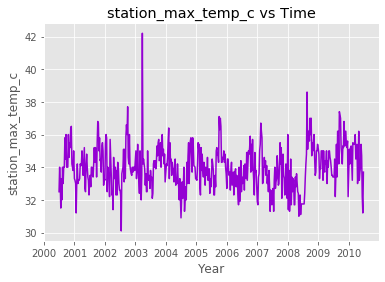


 station_max_temp_c is the Maximum temperature




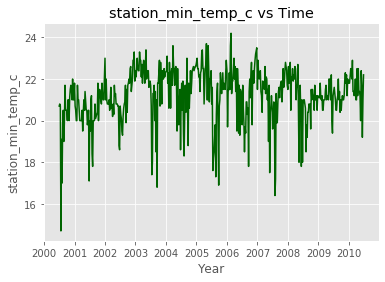


 station_min_temp_c is the Minimum temperature




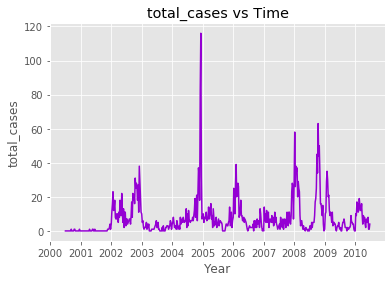


 total_cases is the total no of cases




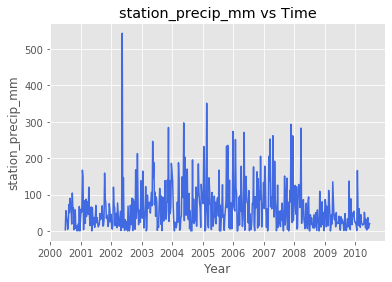


 station_precip_mm is the Total precipitation




In [0]:
#visualization for the city iq(Iquitos)
set_of_colors=['blue','darkgreen','brown','royalblue','maroon','darkviolet','slateblue','indigo']

d_columns=data_iq.columns
for col in d_columns:
  if col not in ['year','weekofyear','city']:
    dfo=data_iq[col]
    mat.style.use('ggplot')
    mat.plot(dfo.index,dfo,color=random.choice(set_of_colors))
    mat.xlabel('Year') 
    mat.ylabel(col)
    mat.title(col+' vs Time')
    mat.show()

    print("\n",col + " is the "+ dataset_det[col]+"\n\n")



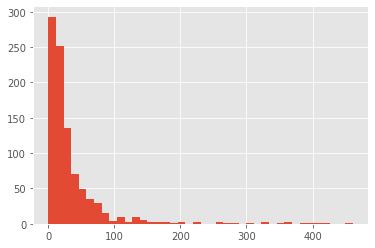

In [0]:
data_sj.total_cases.hist(bins=40)

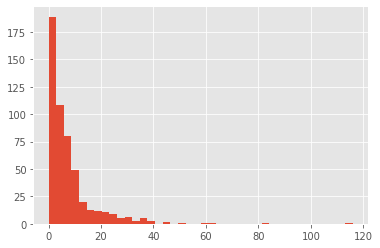

In [0]:
data_iq.total_cases.hist(bins=40)

In [0]:
#it take 1 week for a dengue infected to show symptoms also it take approximately 2 weeks for a mosquito to become adult
#In total we have to shift 3 weeks so that our result can be more accurate
print(data_sj)
data_sj.total_cases=data_sj.total_cases.shift(-3,axis=0)
data_sj

                city  year  ...  total_cases  station_precip_mm
week_start_date             ...                                
1990-04-30        sj  1990  ...            4               16.0
1990-05-07        sj  1990  ...            5                8.6
1990-05-14        sj  1990  ...            4               41.4
1990-05-21        sj  1990  ...            3                4.0
1990-05-28        sj  1990  ...            6                5.8
...              ...   ...  ...          ...                ...
2008-03-25        sj  2008  ...            4                1.8
2008-04-01        sj  2008  ...            3                0.5
2008-04-08        sj  2008  ...            1               30.7
2008-04-15        sj  2008  ...            3               11.2
2008-04-22        sj  2008  ...            5                0.3

[936 rows x 24 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


city  year  ...  total_cases  station_precip_mm
week_start_date             ...                                
1990-04-30        sj  1990  ...          3.0               16.0
1990-05-07        sj  1990  ...          6.0                8.6
1990-05-14        sj  1990  ...          2.0               41.4
1990-05-21        sj  1990  ...          4.0                4.0
1990-05-28        sj  1990  ...          5.0                5.8
...              ...   ...  ...          ...                ...
2008-03-25        sj  2008  ...          3.0                1.8
2008-04-01        sj  2008  ...          5.0                0.5
2008-04-08        sj  2008  ...          NaN               30.7
2008-04-15        sj  2008  ...          NaN               11.2
2008-04-22        sj  2008  ...          NaN                0.3

[936 rows x 24 columns]

In [0]:
#remove last 3 rows because we dont have the total cases for it
data_sj.drop(data_sj.index[[-1,-2,-3]],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0.5, 1, 'San Juan Variable Correlations')

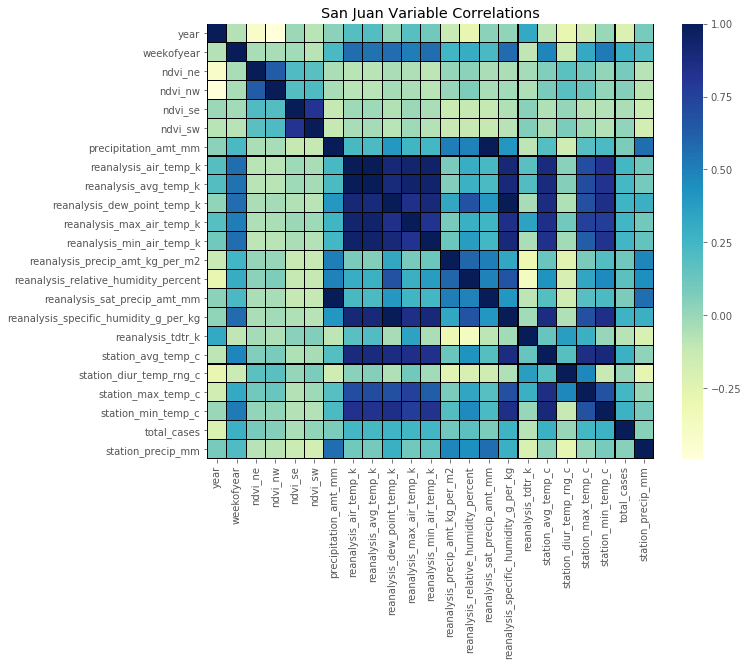

In [0]:
sj_correlation=data_sj.corr()
mat.figure(figsize=(10,8))

sj_corr_heat = sns.heatmap(sj_correlation,cmap="YlGnBu",linewidths=.1,linecolor='black')

mat.title('San Juan Variable Correlations')


In [0]:
#it take 1 week for a dengue infected to show symptoms also it take approximately 2 weeks for a mosquito to become adult
#In total we have to shift 3 weeks so that our result can be more accurate
print(data_iq)
data_iq.total_cases=data_iq.total_cases.shift(-3,axis=0)
data_iq

                city  year  ...  total_cases  station_precip_mm
week_start_date             ...                                
2000-07-01        iq  2000  ...            0                3.0
2000-07-08        iq  2000  ...            0               55.6
2000-07-15        iq  2000  ...            0               38.1
2000-07-22        iq  2000  ...            0               30.0
2000-07-29        iq  2000  ...            0                4.0
...              ...   ...  ...          ...                ...
2010-05-28        iq  2010  ...            5               27.0
2010-06-04        iq  2010  ...            8               36.6
2010-06-11        iq  2010  ...            1                7.4
2010-06-18        iq  2010  ...            1               16.0
2010-06-25        iq  2010  ...            4               20.4

[520 rows x 24 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


city  year  ...  total_cases  station_precip_mm
week_start_date             ...                                
2000-07-01        iq  2000  ...          0.0                3.0
2000-07-08        iq  2000  ...          0.0               55.6
2000-07-15        iq  2000  ...          0.0               38.1
2000-07-22        iq  2000  ...          0.0               30.0
2000-07-29        iq  2000  ...          0.0                4.0
...              ...   ...  ...          ...                ...
2010-05-28        iq  2010  ...          1.0               27.0
2010-06-04        iq  2010  ...          4.0               36.6
2010-06-11        iq  2010  ...          NaN                7.4
2010-06-18        iq  2010  ...          NaN               16.0
2010-06-25        iq  2010  ...          NaN               20.4

[520 rows x 24 columns]

In [0]:
#remove last 3 rows because we dont have the total cases for it
data_iq.drop(data_iq.index[[-1,-2,-3]],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0.5, 1, 'iquitos Variable Correlations')

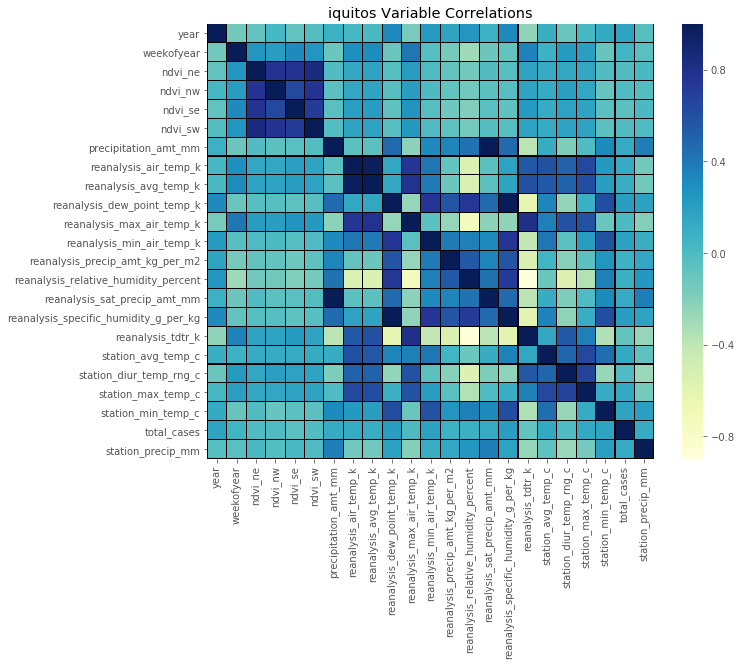

In [0]:
#finding correlation of train data sj
iq_correlation=data_iq.corr()
mat.figure(figsize=(10,8))

iq_corr_heat = sns.heatmap(iq_correlation,cmap="YlGnBu",linewidths=.1,linecolor='black')
mat.title('iquitos Variable Correlations')

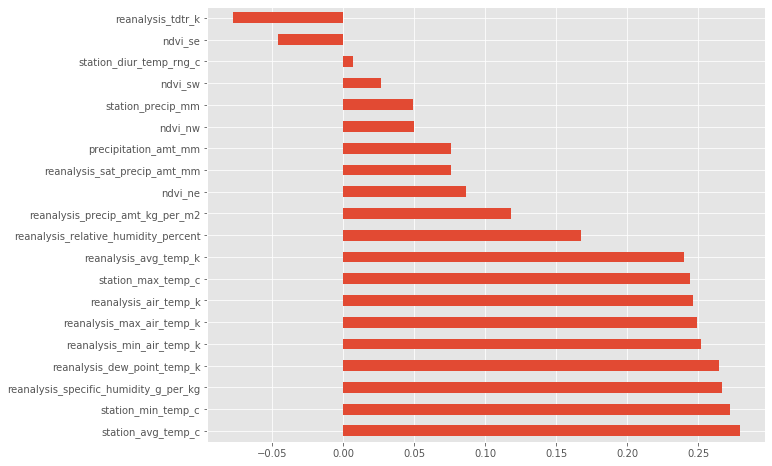

In [0]:
mat.figure(figsize=(10,8))
(sj_correlation
     .total_cases
     .drop('total_cases')
     .drop('weekofyear')
     .drop('year') 
     .sort_values(ascending=False)
     .plot
     .barh())

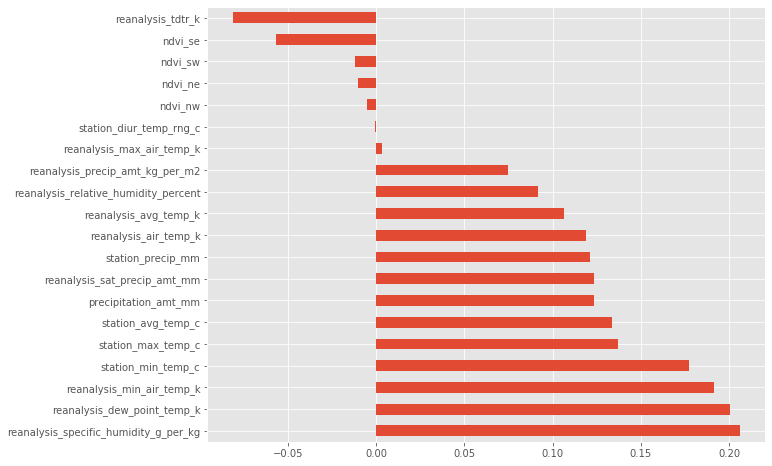

In [0]:
mat.figure(figsize=(10,8))
(iq_correlation
     .total_cases
     .drop('total_cases')
     .drop('weekofyear')
     .drop('year') 
     .sort_values(ascending=False)
     .plot
     .barh())

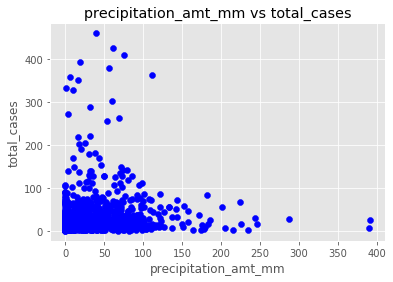

In [0]:
mat.style.use('ggplot')
mat.scatter(data_sj.precipitation_amt_mm,data_sj.total_cases,color=random.choice(set_of_colors))
mat.xlabel('precipitation_amt_mm') 
mat.ylabel('total_cases')
mat.title('precipitation_amt_mm'+' vs total_cases')
mat.show()

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  1.,  4.,  2.,  3.,
         2.,  7.,  7.,  6.,  4.,  5.,  8., 12., 11., 17., 20.,  8., 22.,
        22., 17., 19., 23., 25., 25., 32., 22., 27., 21., 38., 31., 22.,
        43., 33., 33., 25., 23., 42., 23., 17., 17., 37., 20., 19., 13.,
        12., 10., 14., 10.,  9., 11.,  5.,  3.,  2.,  6.,  9.,  3.,  3.,
         3.,  4.,  3.,  1.,  3.,  0.,  3.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([-0.06345714, -0.05900837, -0.0545596 , -0.05011083, -0.04566205,
        -0.04121328, -0.03676451, -0.03231574, -0.02786697, -0.0234182 ,
        -0.01896943, -0.01452065, -0.01007188, -0.00562311, -0.00117434,
         0.00327443,  0.0077232 ,  0.01217197,  0.01662075,  0.02106952,
         0.02551829,  0.02996706,  0.03441583,  0.0388646 ,  0.04331337,
         0.04776215,  0.05221092,  0.05665969,  0.06110846,  0.065557

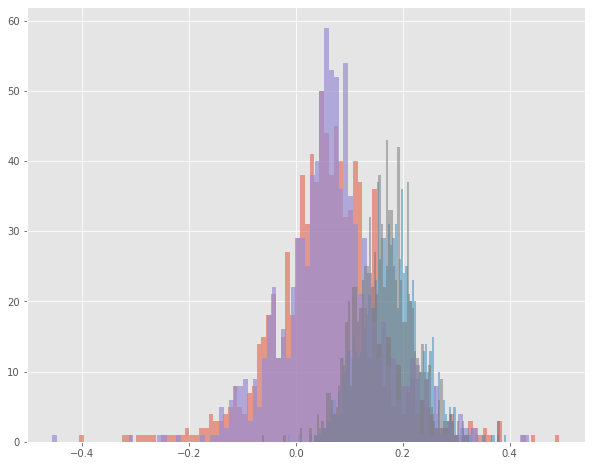

In [0]:
mat.figure(figsize=(10,8))
mat.style.use('ggplot')
mat.hist(data_sj['ndvi_ne'],bins=100,alpha=.5)
mat.hist(data_sj['ndvi_se'],bins=100,alpha=.5)
mat.hist(data_sj['ndvi_nw'],bins=100,alpha=.7)
mat.hist(data_sj['ndvi_sw'],bins=100,alpha=.5)


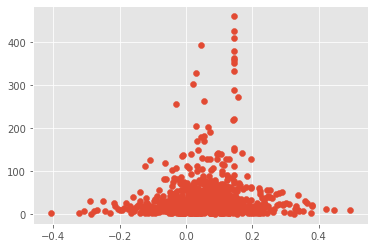

In [0]:

#df3=pd.merge(df1,df2,how='inner')
mat.scatter((data_sj.ndvi_ne+data_sj.ndvi_ne+data_sj.ndvi_ne+data_sj.ndvi_ne)/4,data_sj.total_cases)

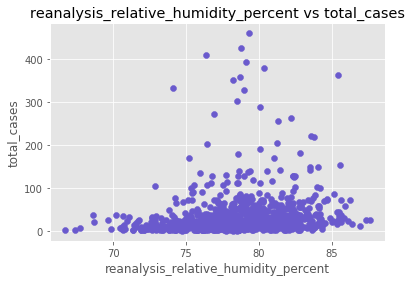

In [0]:
mat.style.use('ggplot')
mat.scatter(data_sj.reanalysis_relative_humidity_percent,data_sj.total_cases,color=random.choice(set_of_colors))
mat.xlabel('reanalysis_relative_humidity_percent') 
mat.ylabel('total_cases')
mat.title('reanalysis_relative_humidity_percent'+' vs total_cases')
mat.show()

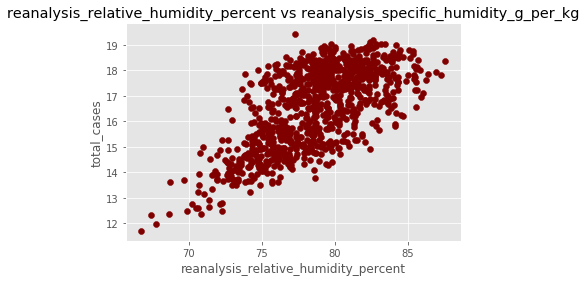

In [0]:
mat.style.use('ggplot')
mat.scatter(data_sj.reanalysis_relative_humidity_percent,data_sj.reanalysis_specific_humidity_g_per_kg,color=random.choice(set_of_colors))
mat.xlabel('reanalysis_relative_humidity_percent') 
mat.ylabel('total_cases')
mat.title('reanalysis_relative_humidity_percent'+' vs reanalysis_specific_humidity_g_per_kg')
mat.show()

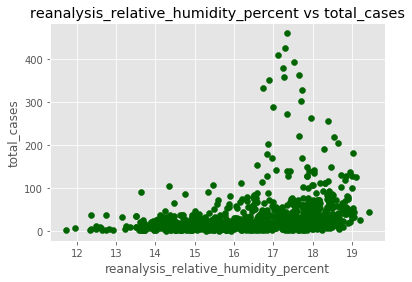

In [0]:
mat.style.use('ggplot')
mat.scatter(data_sj.reanalysis_specific_humidity_g_per_kg,data_sj.total_cases,color=random.choice(set_of_colors))
mat.xlabel('reanalysis_relative_humidity_percent') 
mat.ylabel('total_cases')
mat.title('reanalysis_relative_humidity_percent'+' vs total_cases')
mat.show()

In [0]:
#defing the function
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [0]:
# ADF Test on each column
print(data_sj['year'])
data_sj.drop(['year'],axis=1,inplace=True)
data_sj.drop(['weekofyear'],axis=1,inplace=True)
data_sj.drop(['city'],axis=1,inplace=True)


for name, column in data_sj.iteritems() :
  if(name !="city"):
    adfuller_test(column, name=column.name)
    print('\n')

week_start_date
1990-04-30    1990
1990-05-07    1990
1990-05-14    1990
1990-05-21    1990
1990-05-28    1990
              ... 
2008-03-04    2008
2008-03-11    2008
2008-03-18    2008
2008-03-25    2008
2008-04-01    2008
Name: year, Length: 933, dtype: int64
    Augmented Dickey-Fuller Test on "ndvi_ne" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.8871
 No. Lags Chosen       = 14
 Critical value 1%     = -3.437
 Critical value 5%     = -2.865
 Critical value 10%    = -2.568
 => P-Value = 0.0021. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ndvi_nw" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.1435
 No. Lags Chosen       = 17
 Critical value 1%     = -3.438
 Critical value 5%     = -2.865
 Critical va

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


    Augmented Dickey-Fuller Test on "precipitation_amt_mm" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.9533
 No. Lags Chosen       = 4
 Critical value 1%     = -3.437
 Critical value 5%     = -2.865
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "reanalysis_air_temp_k" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.5186
 No. Lags Chosen       = 20
 Critical value 1%     = -3.438
 Critical value 5%     = -2.865
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "reanalysis_avg_temp_k" 
    -----------------------------------------------
 Null Hypothesis: Data has unit r

In [0]:
datao=data_sj[['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k','reanalysis_min_air_temp_k','station_min_temp_c']]
df_differenced=datao.values


In [0]:

datao=data_sj[['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k','reanalysis_min_air_temp_k','station_min_temp_c','total_cases','station_avg_temp_c','precipitation_amt_mm','station_precip_mm','reanalysis_air_temp_k']]
df_differenced=datao
nobs = 4
datao, df_test = datao[0:-nobs], datao[-nobs:]

# Check size
  # (4, 8)
print(datao)
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

                 reanalysis_specific_humidity_g_per_kg  ...  reanalysis_air_temp_k
week_start_date                                         ...                       
1990-04-30                                   14.012857  ...             297.572857
1990-05-07                                   15.372857  ...             298.211429
1990-05-14                                   16.848571  ...             298.781429
1990-05-21                                   16.672857  ...             298.987143
1990-05-28                                   17.210000  ...             299.518571
...                                                ...  ...                    ...
2008-02-05                                   13.225714  ...             297.237143
2008-02-12                                   14.367143  ...             297.838571
2008-02-19                                   14.538571  ...             297.907143
2008-02-26                                   13.967143  ...             297.765714
2008

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
model_fitted = model.fit(3)
model_fitted.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/vector_ar/var_model.py:1431: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self._cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 09, Dec, 2019
Time:                     13:54:09
---------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    -403.402
Nobs:                     833.000    HQIC:                   -431.763
Log likelihood:           184646.    FPE:               -1.07635e-191
AIC:                     -449.399    Det(Omega_mle):    -1.46662e-194
---------------------------------------------------------------------
Results for equation reanalysis_specific_humidity_g_per_kg
                                                coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------------------
const                                             -0.000334              NAN              NAN             NAN
L1.reanalysis_sp

In [0]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

100


array([[1.61242857e+01, 2.94727143e+02, 2.96500000e+02, 2.22000000e+01,
        1.10000000e+01, 2.65000000e+01, 5.44700000e+01, 6.61000000e+01,
        2.98872857e+02],
       [1.49857143e+01, 2.93515714e+02, 2.96700000e+02, 2.22000000e+01,
        5.00000000e+00, 2.59428571e+01, 1.20900000e+01, 8.08000000e+01,
        2.98120000e+02],
       [1.77342857e+01, 2.96295714e+02, 2.97200000e+02, 2.33000000e+01,
        5.00000000e+00, 2.78142857e+01, 1.03950000e+02, 1.56000000e+01,
        2.99171429e+02],
       [1.77928571e+01, 2.96365714e+02, 2.99000000e+02, 2.44000000e+01,
        6.00000000e+00, 2.90285714e+01, 3.70000000e+00, 5.00000000e-01,
        3.00501429e+02],
       [1.72900000e+01, 2.95912857e+02, 2.98600000e+02, 2.44000000e+01,
        6.00000000e+00, 2.85857143e+01, 6.49200000e+01, 2.21000000e+01,
        3.00570000e+02],
       [1.74642857e+01, 2.96052857e+02, 2.98600000e+02, 2.44000000e+01,
        4.00000000e+00, 2.89142857e+01, 1.99300000e+01, 1.30000000e+00,
        3.0

In [0]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_differenced.index[-nobs:], columns=datao.columns+"forecasted" )
df_forecast

reanalysis_specific_humidity_g_per_kgforecasted  ...  reanalysis_air_temp_kforecasted
week_start_date                                                   ...                                 
2007-04-23                                             11.308291  ...                       295.457263
2007-04-30                                              9.767622  ...                       295.450042
2007-05-07                                              6.417274  ...                       296.958094
2007-05-14                                             11.614163  ...                       300.796835
2007-05-21                                             10.650045  ...                       300.850081
2007-05-28                                             10.254927  ...                       306.325382
2007-06-04                                             13.586016  ...                       303.759379
2007-06-11                                             16.622708  ...                       301.638003
2007-06-18                                             17.504125  ...                       305.212848
2007-06-25                                             19.739314  ...                       300.736750
2007-07-02                                             21.102541  ...                       304.840159
2007-07-09                                             19.306712  ...                       305.308956
2007-07-16                                             21.941645  ...                       303.042973
2007-07-23                                             20.714136  ...                       305.290871
2007-07-30                                             16.629539  ...                       304.793393
2007-08-06                                             14.625655  ...                       300.466745
2007-08-13                                             12.640116  ...                       308.496816
2007-08-20                                             18.032822  ...                       310.876326
2007-08-27                                             19.750888  ...                       309.552725
2007-09-03                                             18.238022  ...                       314.467766
2007-09-10                                             24.442331  ...                       317.789614
2007-09-17                                             23.406239  ...                       308.818480
2007-09-24                                             31.248561  ...                       318.688731
2007-10-01                                             32.315258  ...                       311.420343
2007-10-08                                             32.553653  ...                       310.648769
2007-10-15                                             32.983673  ...                       314.831369
2007-10-22                                             29.562697  ...                       305.595009
2007-10-29                                             34.061214  ...                       315.485204
2007-11-05                                             24.178508  ...                       308.657045
2007-11-12                                             26.133295  ...                       305.994851
2007-11-19                                             19.171041  ...                       310.921432
2007-11-26                                             21.169430  ...                       309.974577
2007-12-03                                             29.889966  ...                       307.837533
2007-12-10                                             25.267833  ...                       314.079821
2007-12-17                                             28.671998  ...                       309.184554
2007-12-24                                             22.123841  ...                       304.100668
2008-01-01                                             30.984388  ...                       310.747562


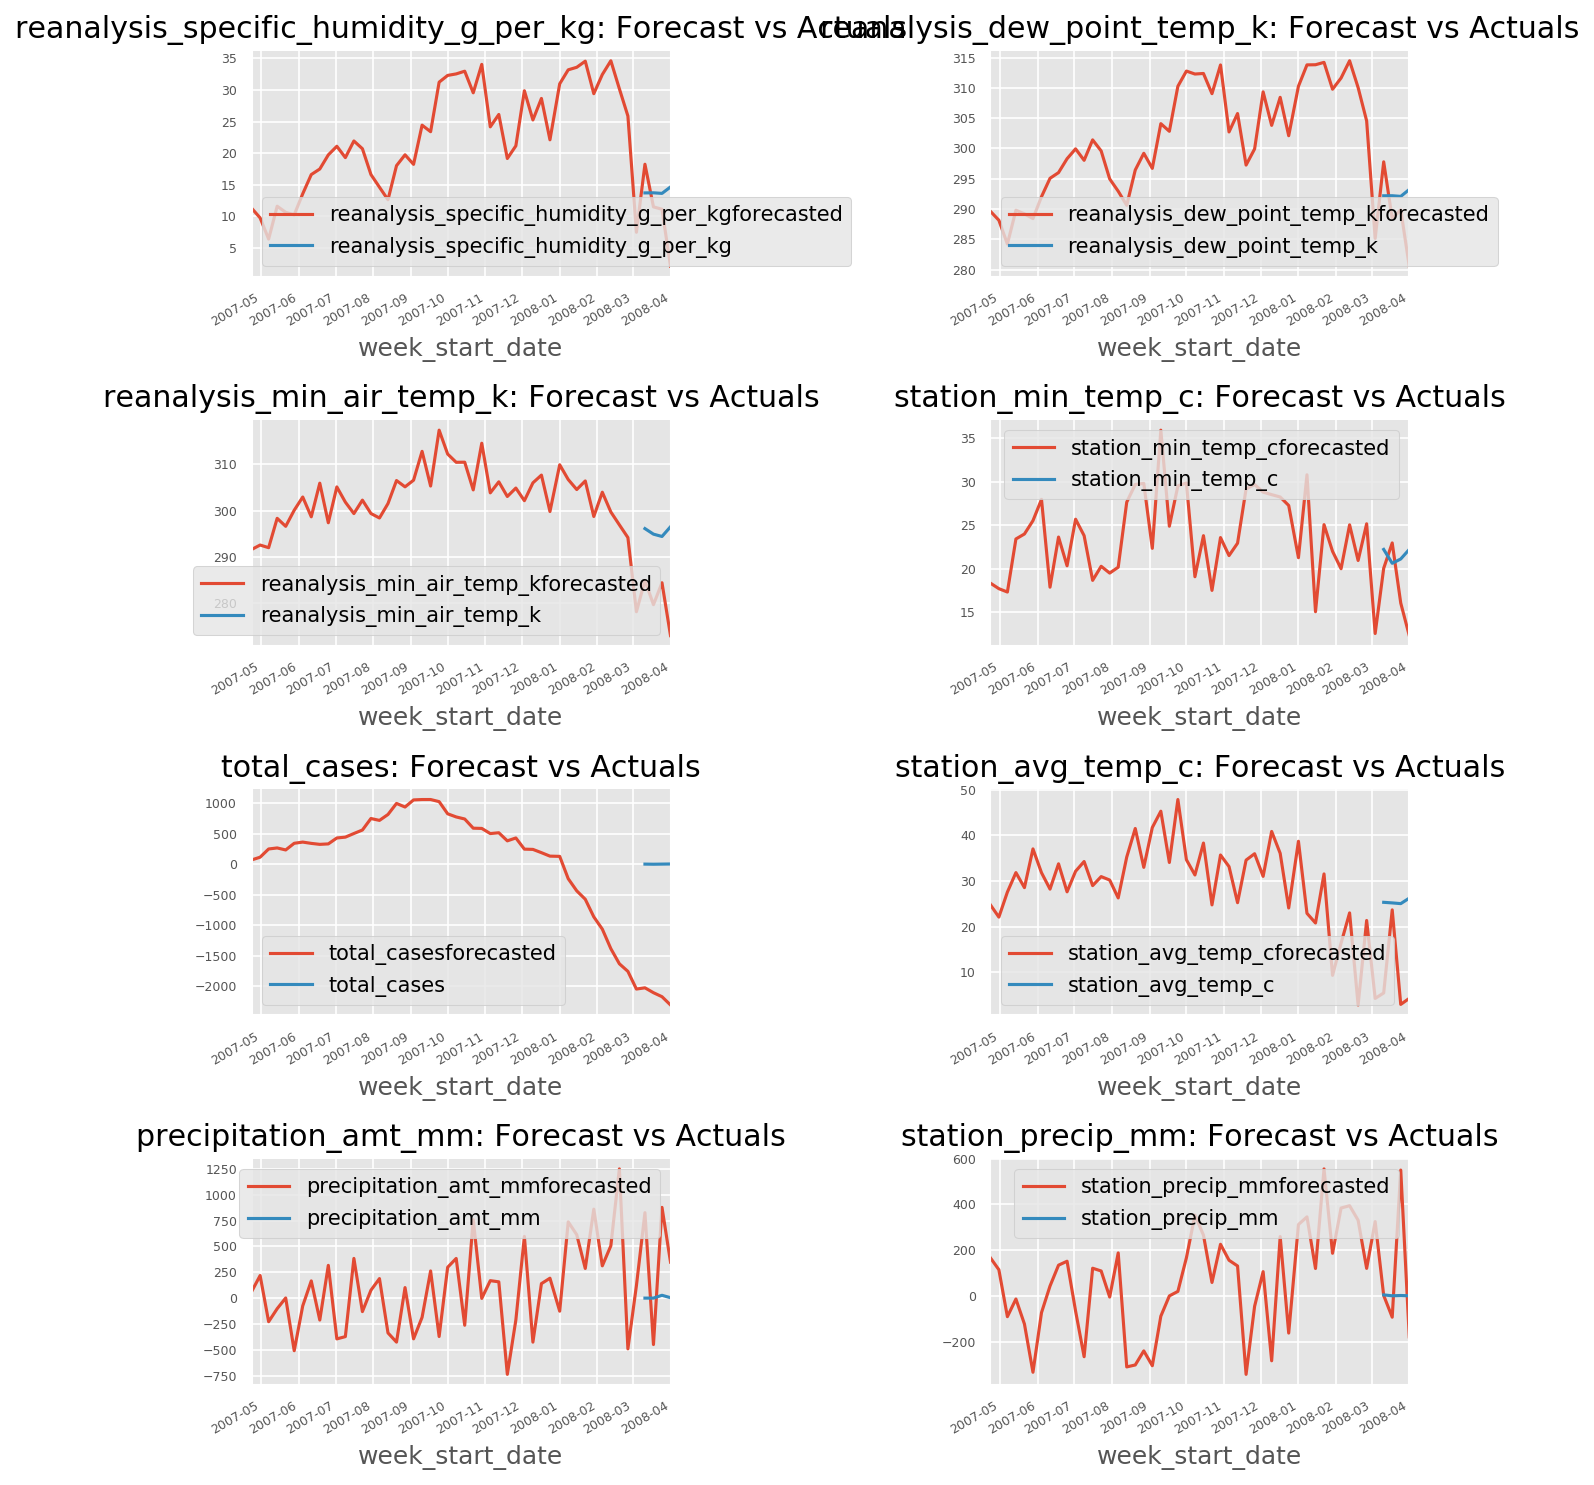

In [0]:
fig, axes = mat.subplots(nrows=int(len(datao.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(datao.columns, axes.flatten())):
    df_forecast[col+"forecasted"].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

mat.tight_layout();

In [0]:
# ADF Test on each column
#prediction for city iquitos begins here
data_iq.drop(['year'],axis=1,inplace=True)
data_iq.drop(['weekofyear'],axis=1,inplace=True)
data_iq.drop(['city'],axis=1,inplace=True)


for name, column in data_iq.iteritems() :
  if(name !="city"):
    adfuller_test(column, name=column.name)
    print('\n')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


    Augmented Dickey-Fuller Test on "ndvi_ne" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.5446
 No. Lags Chosen       = 6
 Critical value 1%     = -3.443
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ndvi_nw" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.4633
 No. Lags Chosen       = 3
 Critical value 1%     = -3.443
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ndvi_se" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    

In [0]:
datao=data_iq[['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k','reanalysis_min_air_temp_k','station_min_temp_c','total_cases','station_avg_temp_c','precipitation_amt_mm','station_precip_mm','reanalysis_air_temp_k']]
df_differenced=datao
nobs = 4
datao, df_test = datao[0:-nobs], datao[-nobs:]

# Check size
  # (4, 8)
print(datao)
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

                 reanalysis_specific_humidity_g_per_kg  ...  reanalysis_air_temp_k
week_start_date                                         ...                       
2000-07-01                                   16.651429  ...             296.740000
2000-07-08                                   16.862857  ...             296.634286
2000-07-15                                   17.120000  ...             296.415714
2000-07-22                                   14.431429  ...             295.357143
2000-07-29                                   15.444286  ...             296.432857
...                                                ...  ...                    ...
2010-04-09                                   20.078571  ...             299.115714
2010-04-16                                   18.677143  ...             298.305714
2010-04-23                                   19.448571  ...             298.438571
2010-04-30                                   18.068571  ...             299.048571
2010

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 09, Dec, 2019
Time:                     13:35:34
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    13.8815
Nobs:                     515.000    HQIC:                   13.0246
Log likelihood:          -9617.40    FPE:                    261084.
AIC:                      12.4723    Det(Omega_mle):         188441.
--------------------------------------------------------------------
Results for equation reanalysis_specific_humidity_g_per_kg
                                              coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------------
const                                          621.996717       183.882800            3.383           0.001
L1.reanalysis_specific_humid

In [0]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

2


array([[ 18.48571429, 296.82571429, 294.5       ,  22.4       ,
          1.        ,  28.63333333,  55.3       ,  27.        ,
        299.33428571],
       [ 18.07      , 296.45285714, 291.9       ,  21.7       ,
          4.        ,  27.43333333,  86.47      ,  36.6       ,
        298.33      ]])

In [0]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_differenced.index[-nobs:], columns=datao.columns+"forecasted" )
df_forecast

reanalysis_specific_humidity_g_per_kgforecasted  ...  reanalysis_air_temp_kforecasted
week_start_date                                                   ...                                 
2010-05-14                                             17.743264  ...                       298.351738
2010-05-21                                             17.819413  ...                       298.300223
2010-05-28                                             17.682829  ...                       298.215990
2010-06-04                                             17.646733  ...                       298.151905

[4 rows x 9 columns]

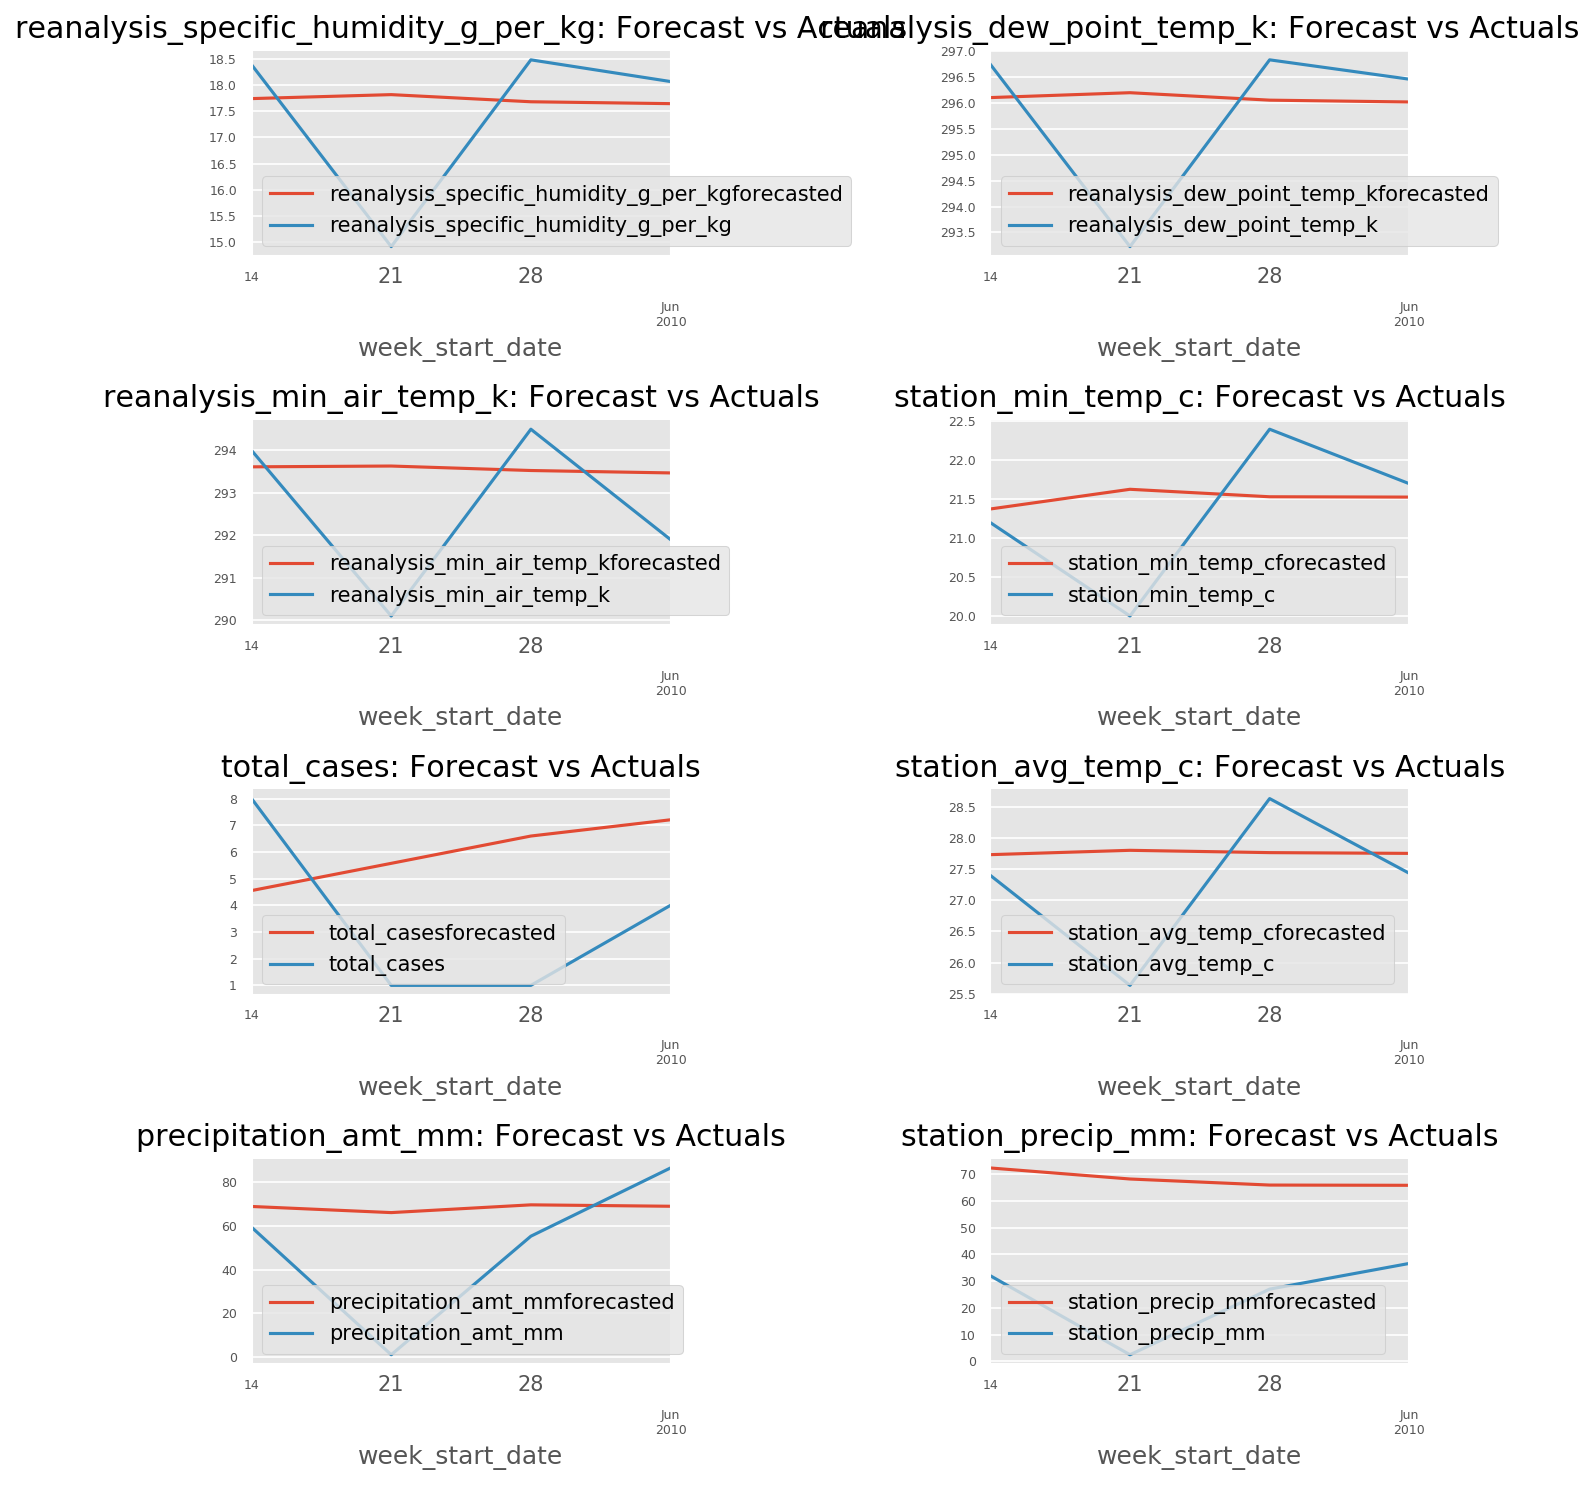

In [0]:
fig, axes = mat.subplots(nrows=int(len(datao.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(datao.columns, axes.flatten())):
    df_forecast[col+"forecasted"].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

mat.tight_layout();

In [0]:
print("forecast finished \nThank God \n credits: https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/")

forecast finished 
Thank God 
 credits: https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
